<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_466to486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **CHAPTER 08 텍스트분석**

##**NLP이냐 텍스트 분석이냐?**

- NLP(National Language Processing)
  - 머신이 인간의 언어를 이해하고 해석하는 데 더 중점을 둠
- 텍스트 분석(Text Analytics, TA)
  - (=텍스트 마이닝 Text Mining)
  - 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 둠

<br>

머신러닝의 텍스트 데이터를 기반으로 모델을 학습하고 예측하는 기반으로 변경되면서 NLP와 텍스트 분석의 발전이 이루어짐.

<br>

텍스트 분석은 머신러닝, 언어 이해, 통계등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행
- 텍스트 분류(Text Classification)
- 감성 분석(Sentiment Analysis)
- 텍스트 요약(Summarization)
- 텍스트 군집화(Clustering)와 유사도 측정



## **01 텍스트 분석 이해**

- 텍스트 분석은 비정형 데이터인 텍스트를 분석
- 머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에 텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가 하는 것이 매우 중요한 요소
- 피처 벡터화(Feature Vectorization) 또는 피처 추출(Feature Extraction)
  - 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 표현
  - BOW(Bag of Words)와 WordVec 방법

### **텍스트 분석 수행 프로세스**
1. 텍스트 사전 준비작업(텍스트 전처리): 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어(Word) 등의 토큰화 작업, 의미없는 단어(Stop word) 제거 작업, 어근 추출 등의 텍스트 정규화 작업을 수행하는 것
2. 피처 벡터화/추출
3. ML 모델 수립 및 학습/예측/평가

### **파이썬 기반의 NLP, 텍스트 분석 패키지**
- NLTK(Natural Language Toolkit for Python: 파이썬의 가장 대표적인 NLP 패키지. 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버. 하지만 수행 속도 측면에서 아쉬운 부분이 있어서 실제 대량의 데이터 기반에서는 제대로 활용되지 못하고 있음
- Gensim: 토픽 모델링 분야에서 가장 두각을 나타내는 패키지. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공, Word2Vec 구현 등의 다양한 신기능 제공
- SpaCy: 뛰어난 수행 성능으로 최근 가장 주목받는 NLP 패키지

*사이킷런은 머신러닝 위주의 라이브러리로 NLP를 위한 다양한 라이브러리를 가지고 있지 않지만 텍스트 데이터를 피처로 처리하기 위한 편리한 기능을 제공



## **02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**

텍스트 자체를 바로 피처로 만들 수는 없으므로 사전에 텍스트를 가공하는 준비 작업이 필요

**텍스트 정규화 작업**
- 클렌징(Cleansing)
- 토큰화(Tokenization)
- 필터링/스톱 워드 제거/철자 수정
- Stemming
- Lemmatization

###**클렌징**
텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거. ex) HTML, XML

###**텍스트 토큰화**
**토큰화의 유형**
- 문장 토큰화: 문서에서 문장을 분리
- 단어 토큰화: 문장에서 단어를 토큰으로 분리

**문장 토큰화**
- 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적
- 정규 표현식에 따른 문장 토큰화도 가능


<br>

NTLK에서 sent_tokenize를 이용해 토큰화 수행
- 3개의 문장으로 이루어진 텍스트 문서를 문장으로 분리

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample='The Matrix is everywhere its all around us, here even in this room. \
            You can see it out your window or on your television. \
            You feel it when you go to work, or go to church or pay your taxes.'

sentences=sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**
- 공백, 콤마(,), 마침표(.), 개행문자 등으로 단어를 분리
- 정규 표현식을 이용해 다양한 유형으로 투큰화를 수행 가능

In [2]:
from nltk import word_tokenize

sentence='The Matrix is everywhere its all around us, here even in this room.'
words=word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


- sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화

In [3]:
from nltk import word_tokenize, sent_tokenize
def tokenize_text(text):

  sentences=sent_tokenize(text)
  word_tokens=[word_tokenize(sentence) for sentence in sentences]
  return word_tokens

word_tokens=tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수 밖에 없음
- 이러함 문제를 해결해 보고자 도입 된 것이 n-gram
- n-gram: 연속된 n개의 단어를하나의 토큰화 단위로 분리, n개의 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화 수행

###**스톱 워드 제거**
- 스톱워드: 분석에서 큰 의미가 없는 단어
  - is, the, a, will 등 문장을 구성하는 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어
- 이것들을 사전에 제거하지 않으면 그 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있음
- NLTK의 경우 다양한 언어의 스톱 워드를 제공

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어  stop words 개수: ', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어  stop words 개수:  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [6]:
import nltk

stopwords=nltk.corpus.stopwords.words('english')
all_tokens=[]

for sentence in word_tokens:
  filtered_words=[]
  for word in sentence:
    word=word.lower()
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


###**Stemming과 Lemmatization**

- 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것
- Lemmatization: 정교하며 의미론적인 기반에서 단어의 원형을 찾음, 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌. 그래서 변환에 더 오랜 시간이 필요
- Stemming: 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음

In [7]:
from nltk.stem import LancasterStemmer
stemmer=LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


amuse의 경우 amus를 원형 단어로 인식



---

Lemmatization은 보다 정확한 원형 단어 추출을 위해 단어의 **품사**를 입력해줘야 함

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma=WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## **Bag of Words - BOW**

**Bag of Words**
- 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대한 빈도 값을 부여해 피처 값을 추출하는 모델
- 모든 단어를 한꺼번에 봉투 안에 넣은 뒤에 흔들어서 섞는다는 의미

<br>

1. 문장1과 문장2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열. 각 단어에 고유 인덱스를 다음과 같이 부여
2. 개별 문장에 해당 단어가 나타나는 획수를 단어에 기재. 

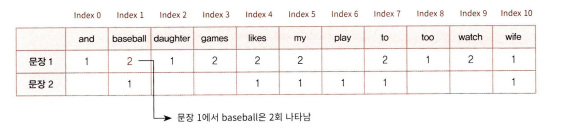

**BOW 모델 장점**
- 쉽고 빠른 구축
- 예상보다 문서의 특징을 잘 나타낼 수 있는 모델로 활용도가 높음

**BOW 모델 단점**
- 문맥 의미(Semantic Context) 반영 부족: 단어의 순서를 고려하지 않으므로 단어의 문맥적인 의미가 무시
- 희소 행렬 문제(희소성, 희소 행렬): BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움: 희소 행렬은 일반적으로 ML 알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련

---

**BOW 피처 벡터화**

머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수 없음. 따라서 텍스트는 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환해야 하는데, 이러한 변환을 피처 벡터화

- BOW 모델에서 피처 벡터화를 수행한다는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
- 예를 들어 M개의 텍스트 문서가 있고, 이 문서에서 모든 단어를 추출해 나열했을 때 N개의 단어가 있다고 가정하면 문서의 피처 벡터화를 수행하면 M개의 문서는 각각 N개의 값이 할당된 피처의 벡터 세트가 됨: M X N 개의 단어 피처로 이뤄진 행렬을 구성

<br>

BOW의 피처 벡터화 방식
- 카운트 기반의 벡터화: 해당 단어가 나타나는 횟수
- TF-IDF 기반의 벡터화: 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식




---

### **사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer**

**Count Vectorizer**
- 클래스는 카운트 기반의 벡터화를 구현한 클래스: 피처 벡터화 + 소문자 일괄 변환, 토큰화, 스톱 워드 필터리 등의 텍스트 전처리

**CountVectorizer의 입력 파라미터**
- max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
- min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
  - 정수 값을 가지면 전체 문서에 걸쳐서 n번 이하로 나타나는 단어는 피처로 추출하지 않음
  - 부동 소수점을 가지면 전체 문서에 걸쳐서 하위 n% 이하의 빈도수를 가지는 단어는 피처로 추출하지 않음
- max_features: 추출하는 피처의 개수를 제한하며 정수로 값을 지정
- stop_words: english로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
- n_gram_range: BOW 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정. 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정
- analyzer: 피처 추출을 수행한 단위를 지정
- token_pattern: 토큰화를 수행하는 정규 표현식 패턴을 지정
- tokenizer: 토큰화를 별도의 커스텀 함수로 이용시 적용

<br>

CountVectorizer 클래스 사용법
1. 영어의 경우 모든 문자를 소문자로 변경하는 등의 전처리 작업 수행
2. 디폴트로 단어 기준으로 n_gram_range를 반영해 각 단어를 토킄ㄴ화
3. 텍스트 정규화 수행



### **BOW 벡터화를 위한 희소 행렬**
- 희소 행렬은 너무 많은 불필요한 0값이 메모리 공간에 할당되어 메모리 공간이 많이 필요하며, 행렬의 크기가 커서 연산 시에도 데이터 액세스를 위한 시간이 많이 소모
- 이러한 희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환해야 함
  - COO형식
  - CSR 형식

<br>

### **희소 행렬-COO형식**
- COO(Coordinate: 좌표) 형식은 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가르키는 행과 열의 윛치를 별도의 배열로 저장하는 방식
- 주로 사이파이 Scipy를 이용


In [10]:
import numpy as np

dense=np.array([[3, 0, 1], [0, 2, 0]])

In [12]:
from scipy import sparse

data=np.array([3, 1, 2])
row_pos=np.array([0,0,1])
col_pos=np.array([0,2,1])

sparse_coo=sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

###**희소 행렬 - CSR 형식**

**CSR(Compressed Sparse Row)** 형식은 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

In [14]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

data2=np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

row_pos=np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos=np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

sparse_coo=sparse.coo_matrix((data2, (row_pos, col_pos)))

row_pos_ind=np.array([0,2,7,9,10,12,13])

sparse_csr=sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [15]:
dense3=np.array([[0,0,1,0,0,5],
                 [1,4,0,3,2,5],
                 [0,6,0,3,0,0],
                 [2,0,0,0,0,0],
                 [0,0,0,7,0,8],
                 [1,0,0,0,0,0]])

coo=sparse.coo_matrix(dense3)
csr=sparse.csr_matrix(dense3)